تبدیل لگاریتمی یکی از تکنیک‌های پرکاربرد در پیش‌پردازش داده‌هاست که برای حل چند مشکل مهم در داده‌ها استفاده می‌شود. در ادامه چند مورد از کاربردهای اصلی تبدیل لگاریتمی آورده میشود
بسیاری از داده‌ها (مثل درآمد، قیمت خانه، جمعیت، و ...) دارای توزیع چوله هستند و تبدیل لگاریتمی میتواند توزیع داده ها را به حالت نرمال (متقارن) نزدیک کند.
همچنین در داده‌هایی که محدوده‌ی مقادیر خیلی بزرگ است (مثلاً از 10 تا 1,000,000)، تبدیل لگاریتمی می‌تواند اختلاف مقادیر را کاهش دهد و تاثیر داده‌های خیلی بزرگ را کنترل کند.
برخی مدلها مثل رگرسیون خطی یا شبکه‌های عصبی به مقیاس داده‌ها حساس هستند و تبدیل لگاریتمی میتواند به پایداری این مدلهای یادگیری ماشیم کمک کند
در مواردی که رابطه بین ویژگی‌ها و هدف به صورت نمایی یا توانی باشد، تبدیل لگاریتمی می‌تواند آن را به یک رابطه خطی تبدیل کند، که برای بسیاری از مدل‌ها ساده‌تر است. 

ابتدا با کمک هیستوگرام توزیع متغیرها را بررسی میکنیم

In [1]:
pip install --upgrade feature engine

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement feature (from versions: none)
ERROR: No matching distribution found for feature


In [3]:
import pandas as pd
import numpy as np
#برای ترسیم نقشه
import matplotlib.pyplot as plt
#برای ترسیم نقشه Q-Q
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import LogTransformer

In [4]:
data = pd.read_csv('BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


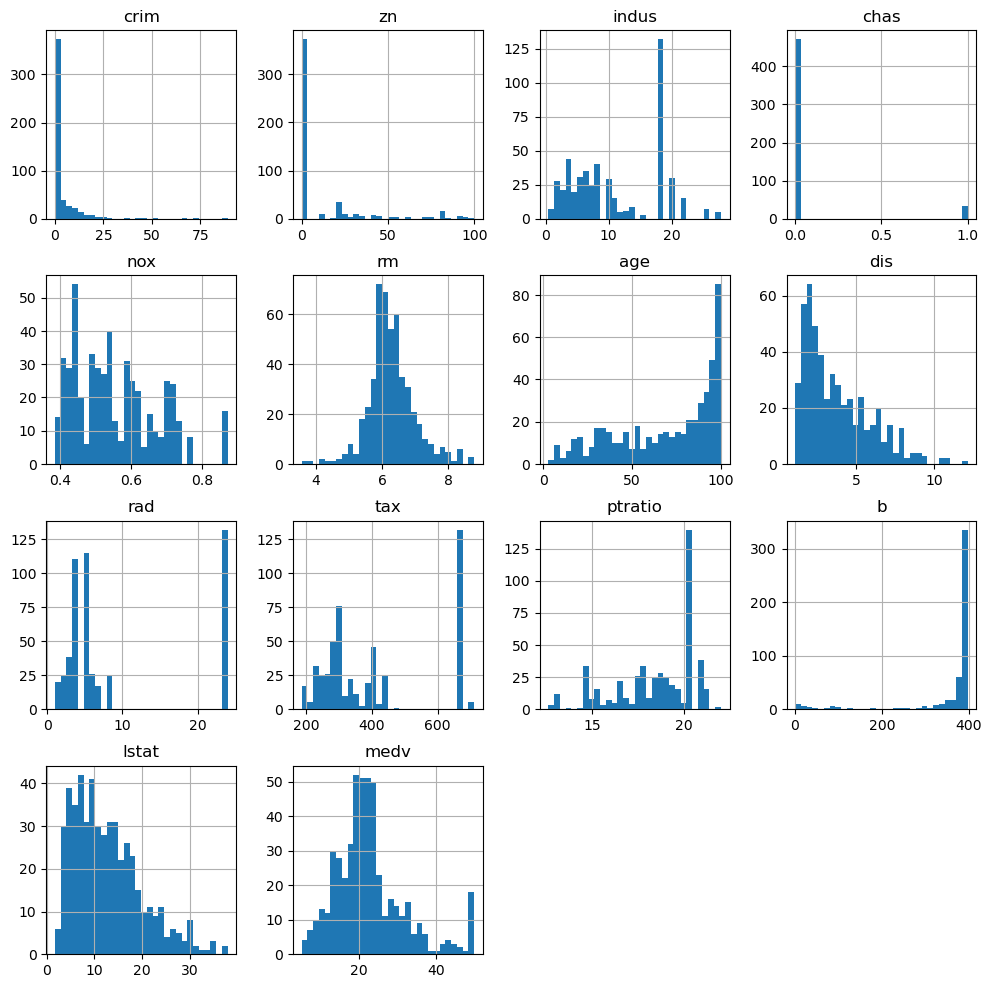

In [5]:
data.hist(bins=30, figsize=(12,12))
plt.show()

تابعی تعریف کنیم که توزیع آماری نتغیرها در دیتافریم را بررسی کند. این تابع دونمودار کنار هم رسم میکند تا بفهمیم آیا داده‌های آن متغیر نرمال هست یا خیر.یکی نمودار هیستوگرام متغیر هست که اگر توزیع چوله باشد معلوم میشود و دیگری نمودار چندکی هست که بررسی میکند آیا داده ها از توزیع نرمال پیروی میکنند یا خیر. اگر نقاط تقریبا روی خط راست بیافتد ، داده‌ها نرمال هستند و اگر انحراف داشت باشند، داده‌ها نرمال نیستند.

In [8]:
def diagnostic_plots(df, variable):
     plt.figure(figsize=(15,6))
     plt.subplot(1, 2, 1)
     df[variable].hist(bins=30)
     plt.subplot(1, 2, 2)
     stats.probplot(df[variable], dist="norm", plot=plt)
     plt.show()

این نمودار را برای یکی از ستونهای دیتافریم بررسی میکنیم و دو نموداری که درباره‌اش صحبت کردیم را نمایش میدهیم

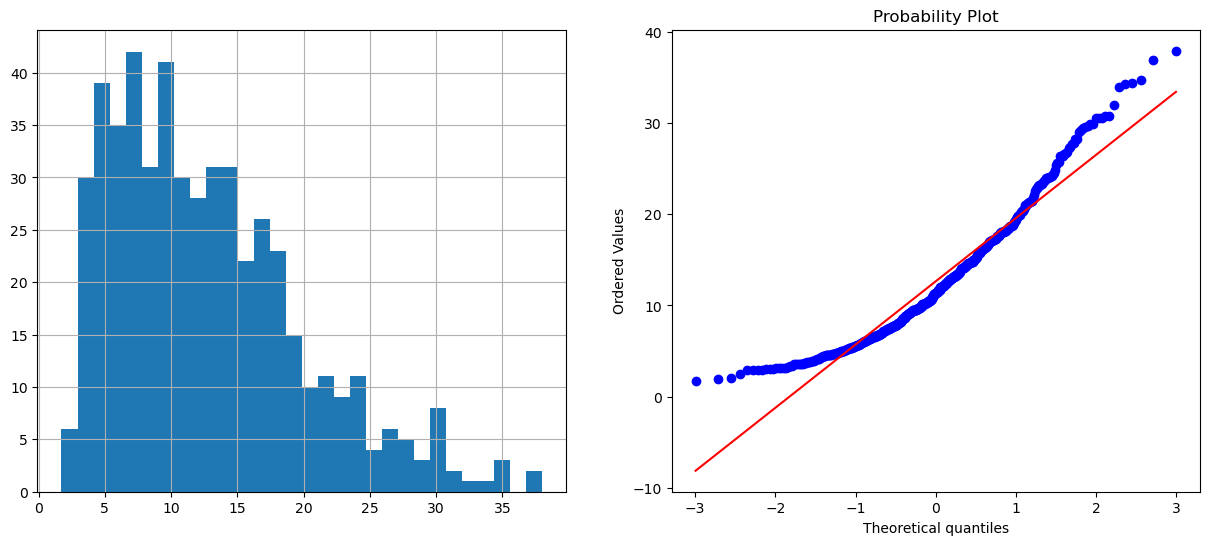

In [10]:
diagnostic_plots(data, 'lstat')

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [43]:
boston_dataset = pd.read_csv('BostonHousing.csv')
data = pd.DataFrame(boston_dataset)
data[cols] = data[cols].fillna(0.1) 

In [44]:
#لیستی از متغیرها برای تبدیل بسازیم
cols = ['lstat', 'nox', 'dis', 'rm']

#ساختن ترنسفورمر در پایپلاین
log_transformer = Pipeline(steps=[('log_transformer',
                                   FunctionTransformer(np.log1p, validate=True))])

preprocessor = ColumnTransformer(transformers=[
    ('log_transformer', log_transformer, cols)], remainder='passthrough')

In [45]:
preprocessor.fit(data)

data_tf = preprocessor.transform(data)

In [46]:
pd.DataFrame(data_tf)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.788421,0.430483,1.627278,2.024853,0.00632,18.0,2.31,0.0,65.2,1.0,296.0,15.3,396.90,24.0
1,2.316488,0.384582,1.786261,2.004314,0.02731,0.0,7.07,0.0,78.9,2.0,242.0,17.8,396.90,21.6
2,1.615420,0.384582,1.786261,2.102303,0.02729,0.0,7.07,0.0,61.1,2.0,242.0,17.8,392.83,34.7
3,1.371181,0.377066,1.954757,2.079192,0.03237,0.0,2.18,0.0,45.8,3.0,222.0,18.7,394.63,33.4
4,1.845300,0.377066,1.954757,2.097650,0.06905,0.0,2.18,0.0,54.2,3.0,222.0,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2.367436,0.452985,1.246630,2.027227,0.06263,0.0,11.93,0.0,69.1,1.0,273.0,21.0,391.99,22.4
502,2.310553,0.452985,1.190127,1.962908,0.04527,0.0,11.93,0.0,76.7,1.0,273.0,21.0,396.90,20.6
503,1.893112,0.452985,1.152943,2.076437,0.06076,0.0,11.93,0.0,91.0,1.0,273.0,21.0,396.90,23.9
504,2.012233,0.452985,1.220505,2.053354,0.10959,0.0,11.93,0.0,89.3,1.0,273.0,21.0,393.45,22.0
